### checking for correlation in feature list

In [11]:
#importing packages
#libraries and functions
import patientFunctions as ptFn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [12]:
#directory management
#updates to directory management
machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
# machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

folderNameHeader = "FeatCorrelation"
folderNameCommon = '_descFits'
folderNameSuffix = "_250224"

fileNameHeader = "FeatCorrelation"
fileNameCommon = '_descFits'
fileNameSuffix = "_250224"

folder_data_out = ptFn.makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)


In [13]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2/020_construction of data frames' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory, "DFsForSVM_CompLabswoEcho_exG01J01_MDfits_20241022_v1")

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
model_features = pd.read_excel("AL-KnownPts_CompLabs_descFits_241022.xlsx", sheet_name = "ALL", header = [0])
# features_across_models= model_features



storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

# creating correlation matrix

In [14]:
#creating correlation matrix
#dropping the first column
feature_list_forCor = model_features.drop(model_features.columns[0], axis= 1)
feature_correlation = feature_list_forCor.corr()

In [16]:

#exporting the correlation matrix
ptFn.outputToExcel(df_data = feature_correlation, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix")


In [17]:
#correlation by amyloid status

#slice data to rows with amyloid positive
features_ALpositive = feature_list_forCor[feature_list_forCor["Amyloid Status_yes"] == 1]
#run correlation and save data
features_ALpositive_corr = features_ALpositive.corr()
ptFn.outputToExcel(df_data = features_ALpositive_corr, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr AL positive")

#slice data for amyloid negative
features_ALneg = feature_list_forCor[feature_list_forCor["Amyloid Status_yes"] == 0]
#run correlation and save data
features_ALneg_corr = features_ALneg.corr()
ptFn.outputToExcel(df_data = features_ALneg_corr, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr AL neg")


## CO2

### filtering for significant only

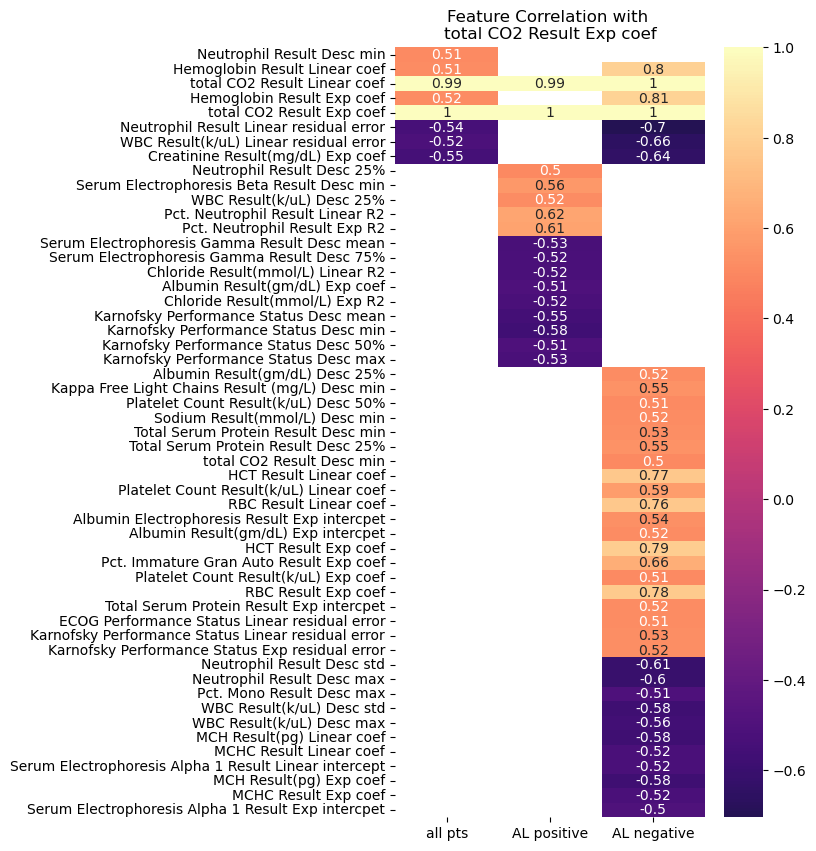

In [62]:
feature_name = "total CO2 Result Exp coef"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix co2")

fig, ax = plt.subplots(figsize= (5,10))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", center = 0, annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_co2"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

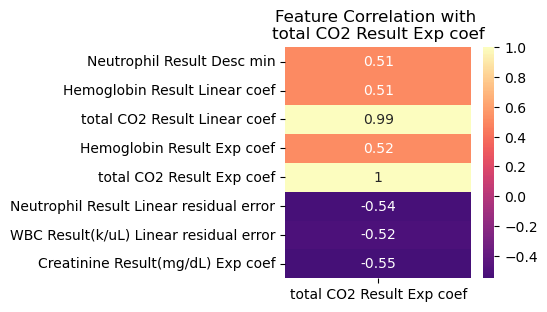

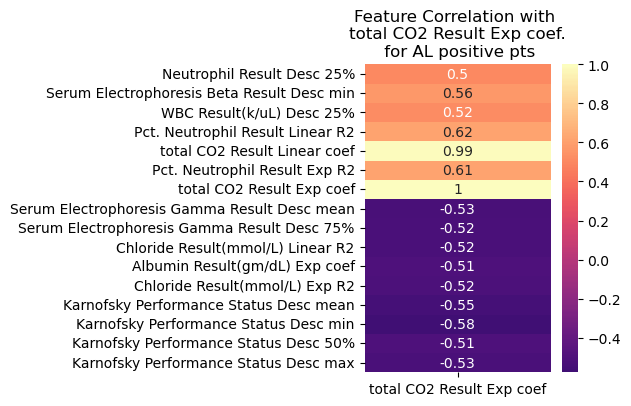

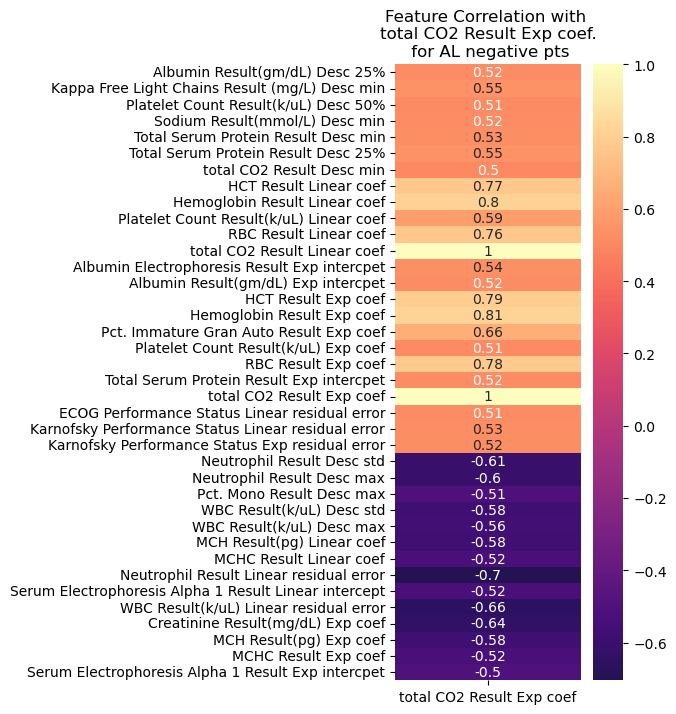

In [63]:
#for all patients
fig, ax = plt.subplots(figsize= (3,3))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", center =0,  annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_co2_allpts"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')


#for the positive cases
fig, ax = plt.subplots(figsize= (3,4))
sns.heatmap(feat_corr_sig_ALpos.to_frame(), cmap= "magma", center = 0, annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name) + ".\n for AL positive pts")

figCommon = "heatmap_co2_ALpos"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

#for the negative cases
fig, ax = plt.subplots(figsize= (3,8))
sns.heatmap(feat_corr_sig_ALneg.to_frame(), cmap= "magma", center = 0, annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name) + ".\n for AL negative pts")

figCommon = "heatmap_co2_ALneg"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

### complete heat map

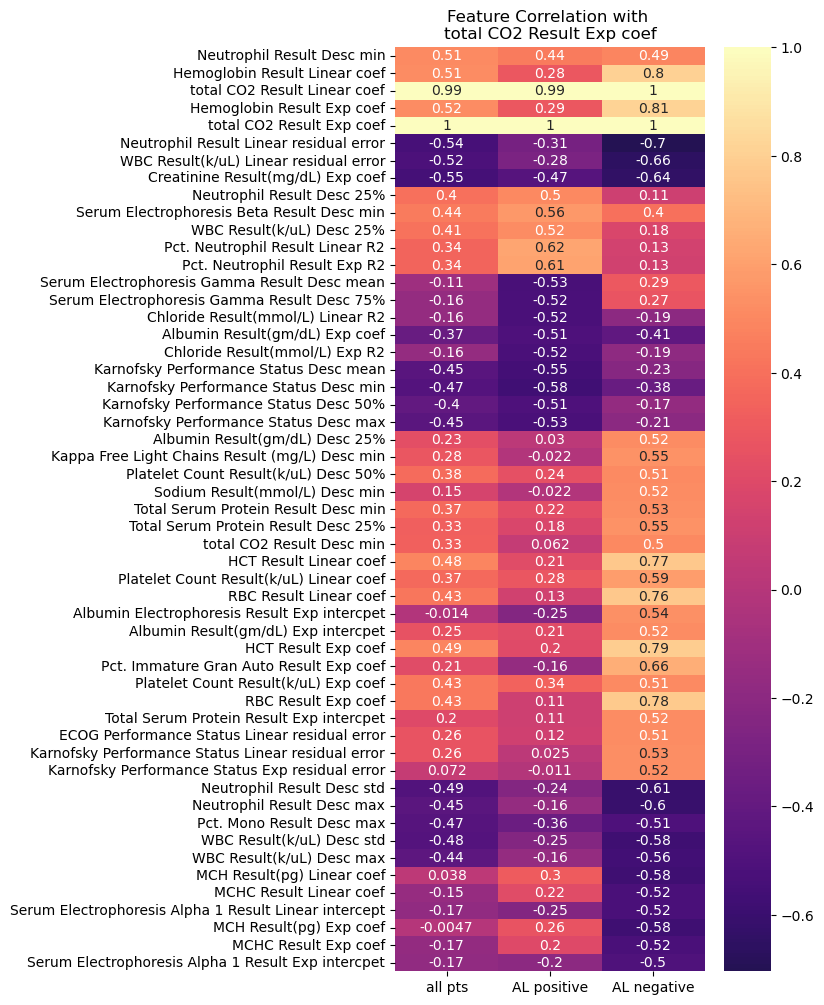

In [64]:
feat_corr_sig_concat_complete = pd.concat([feature_correlation[feature_name][feat_corr_sig_concat.index],
                                           features_ALpositive_corr[feature_name][feat_corr_sig_concat.index],
                                           features_ALneg_corr[feature_name][feat_corr_sig_concat.index]], axis = 1)
feat_corr_sig_concat_complete.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix co2 complete")

fig, ax = plt.subplots(figsize= (5,12))
sns.heatmap(feat_corr_sig_concat_complete, cmap= "magma", center = 0,  annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_co2_complete"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

## chloride

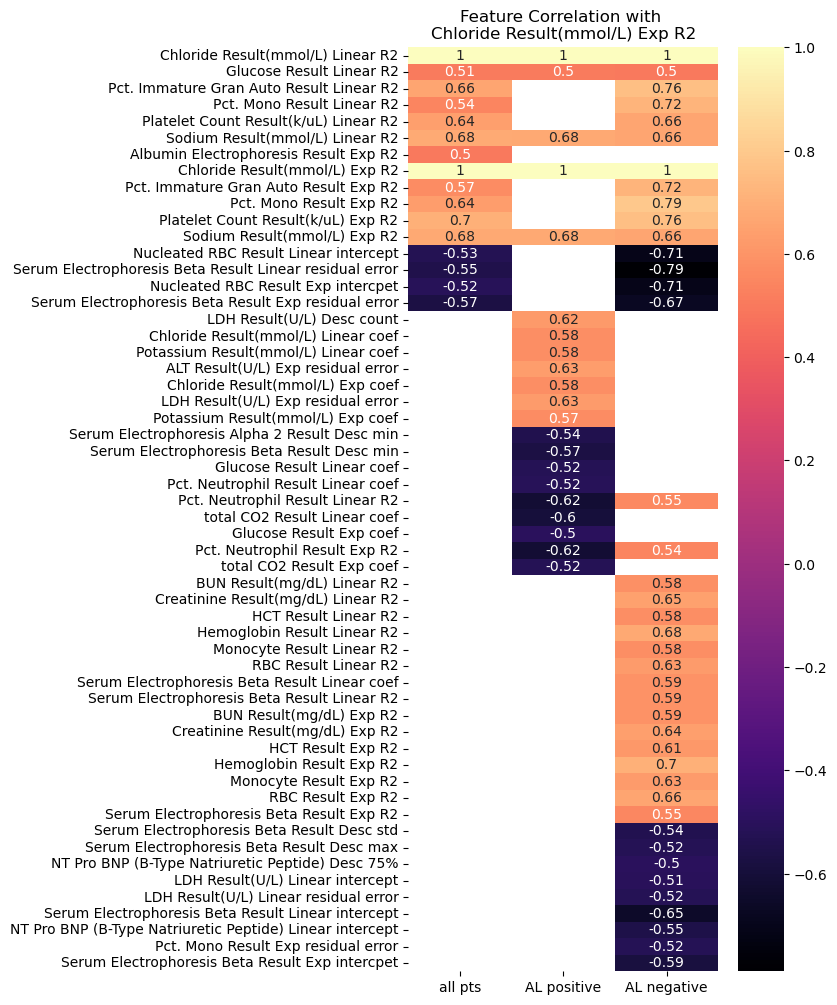

In [29]:
feature_name = "Chloride Result(mmol/L) Exp R2"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix chloride exp r2")

fig, ax = plt.subplots(figsize= (5,12))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_chloride"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

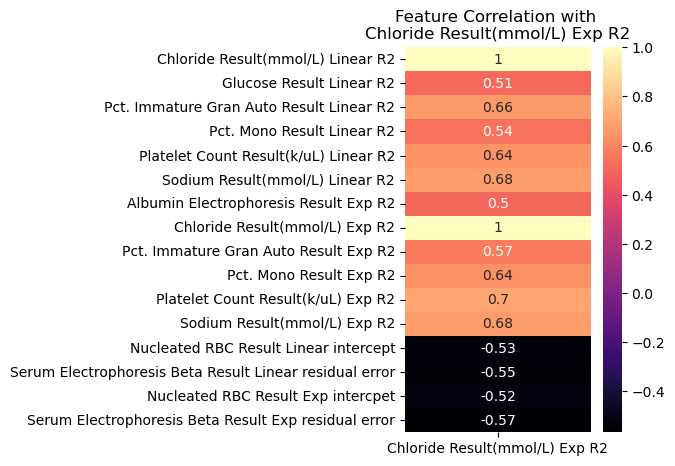

In [30]:
fig, ax = plt.subplots(figsize= (3,5))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_chloride_allpts"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

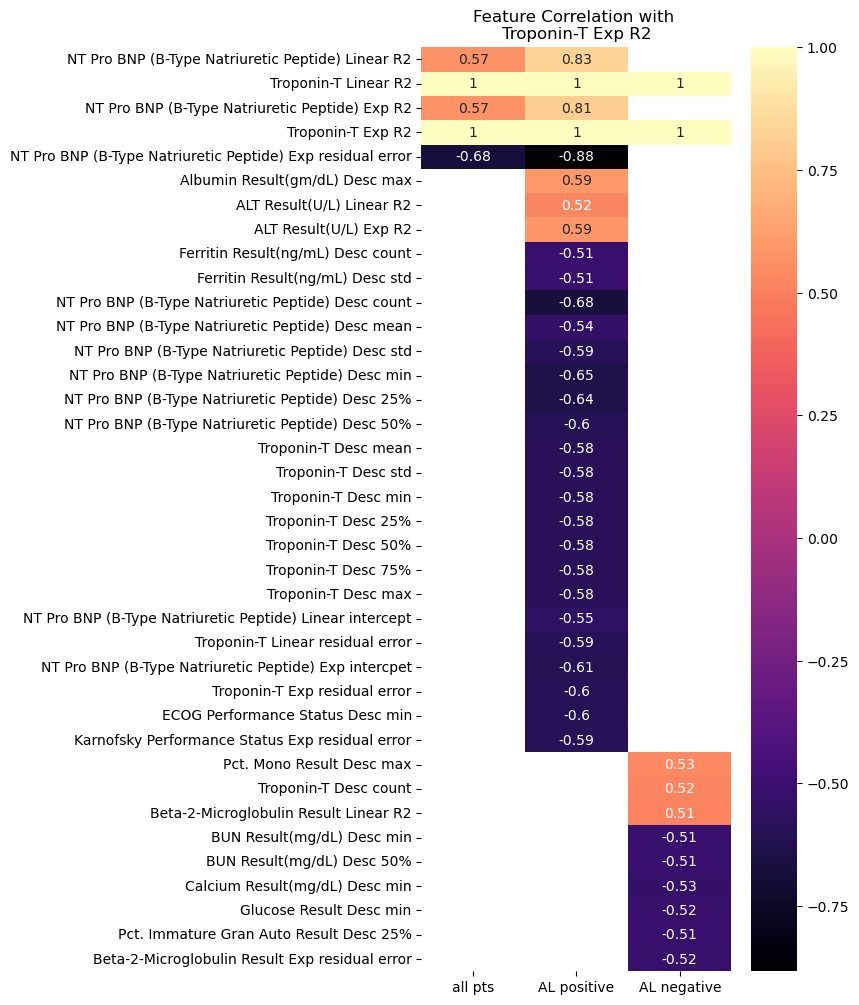

In [27]:
feature_name = "Troponin-T Exp R2"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix troponin exp r2")

fig, ax = plt.subplots(figsize= (5,12))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_troponin"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

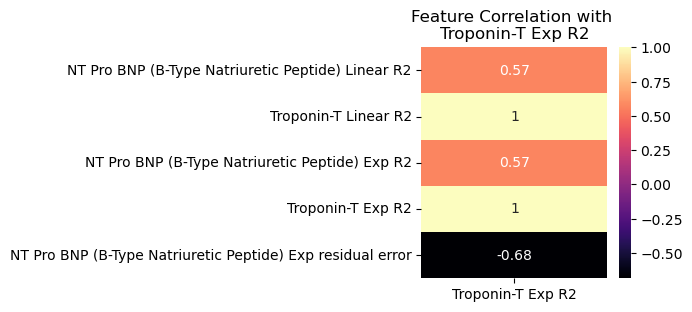

In [28]:
fig, ax = plt.subplots(figsize= (3,3))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_troponin_allpts"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

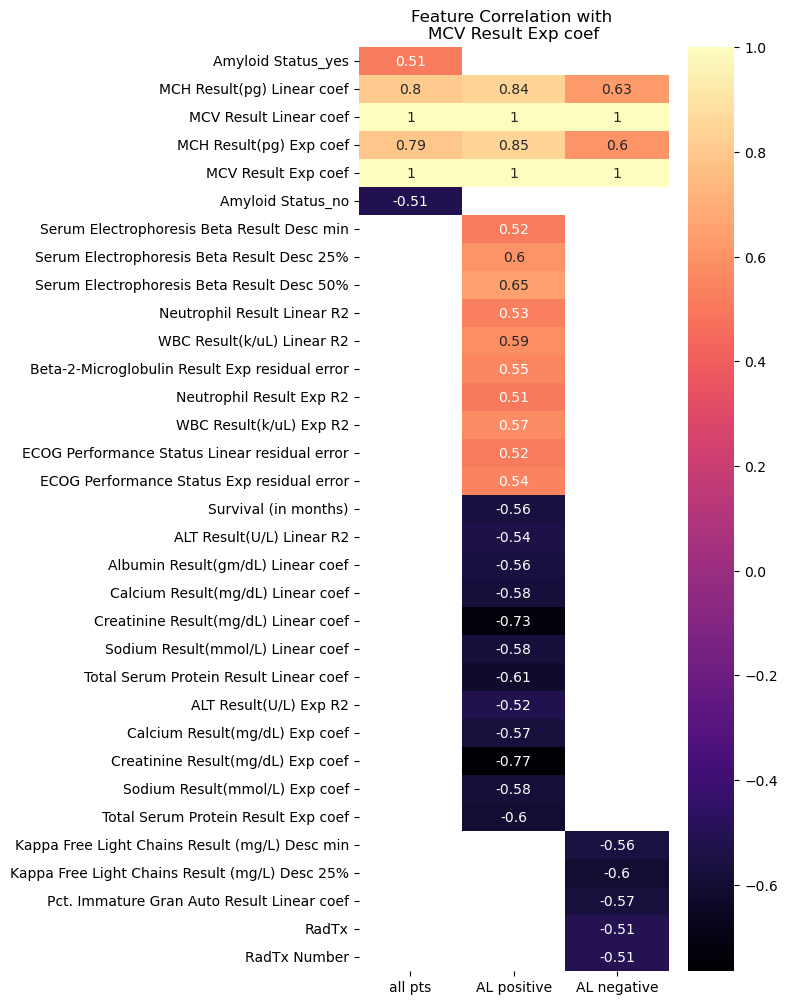

In [31]:
feature_name = "MCV Result Exp coef"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix mcv")

fig, ax = plt.subplots(figsize= (5,12))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_mcv"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

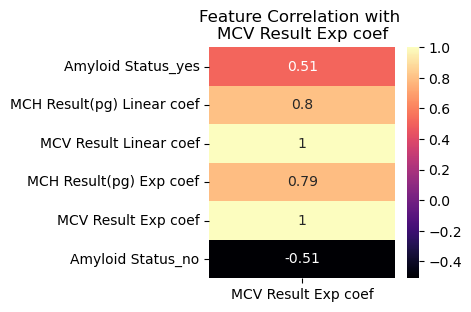

In [32]:
fig, ax = plt.subplots(figsize= (3,3))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_mcv_allpts"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

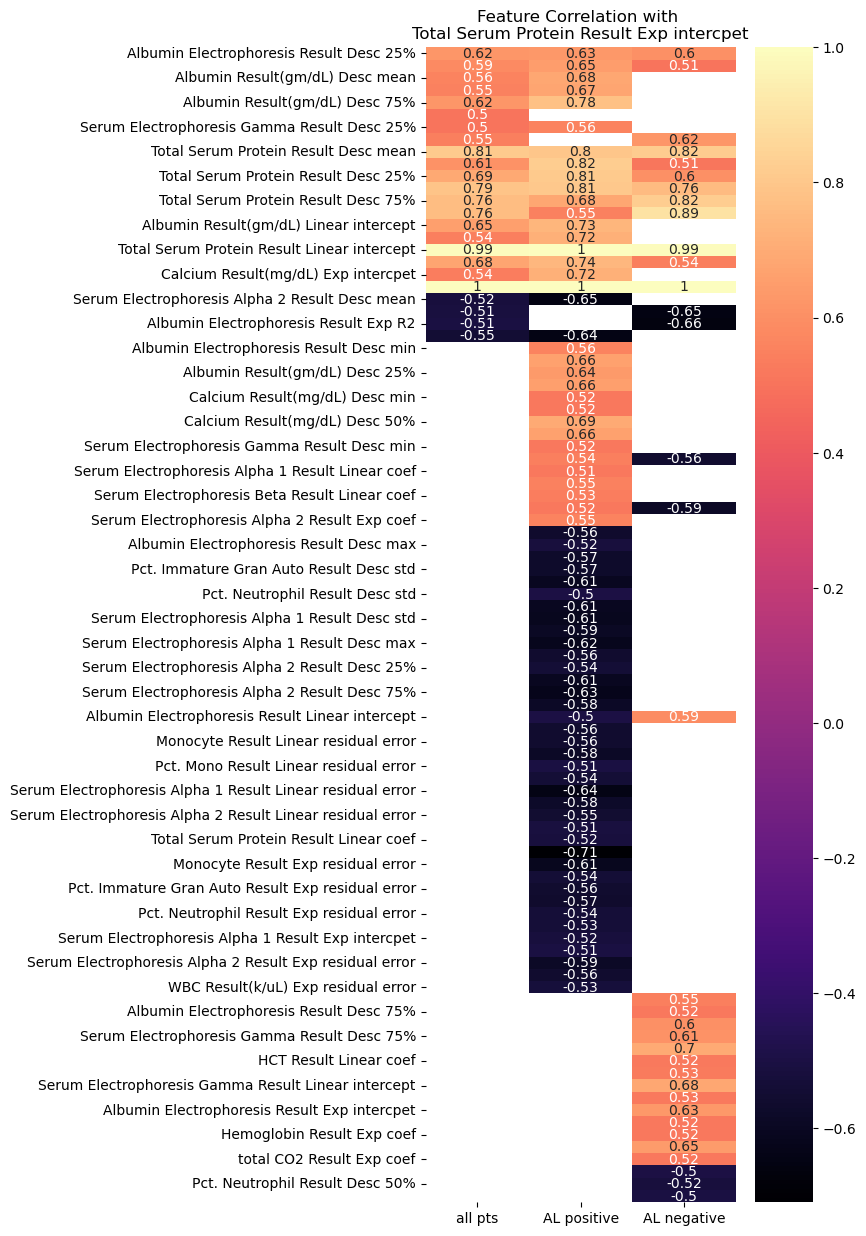

In [38]:
feature_name = "Total Serum Protein Result Exp intercpet"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix serum prot exp int")

fig, ax = plt.subplots(figsize= (5,15))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_serumProtExpInt"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

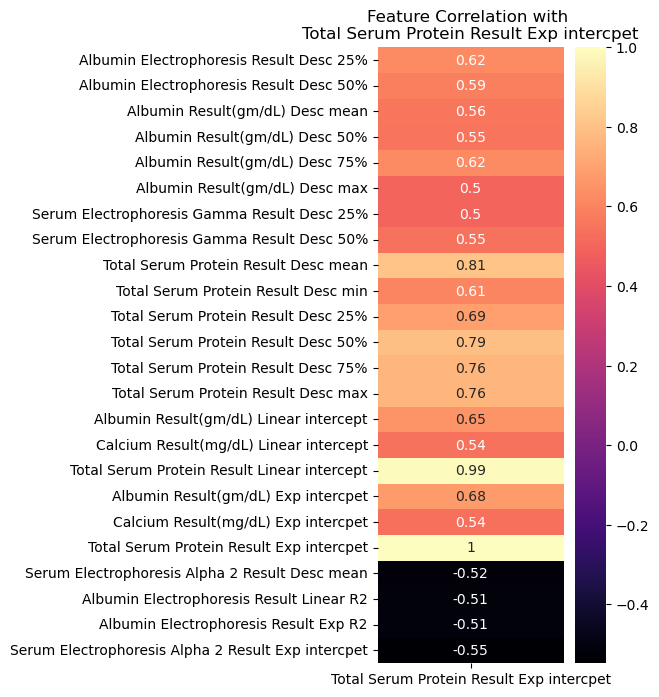

In [41]:
fig, ax = plt.subplots(figsize= (3,8))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_serumProtExpInt_allpts"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

# Features from Dr. K's code

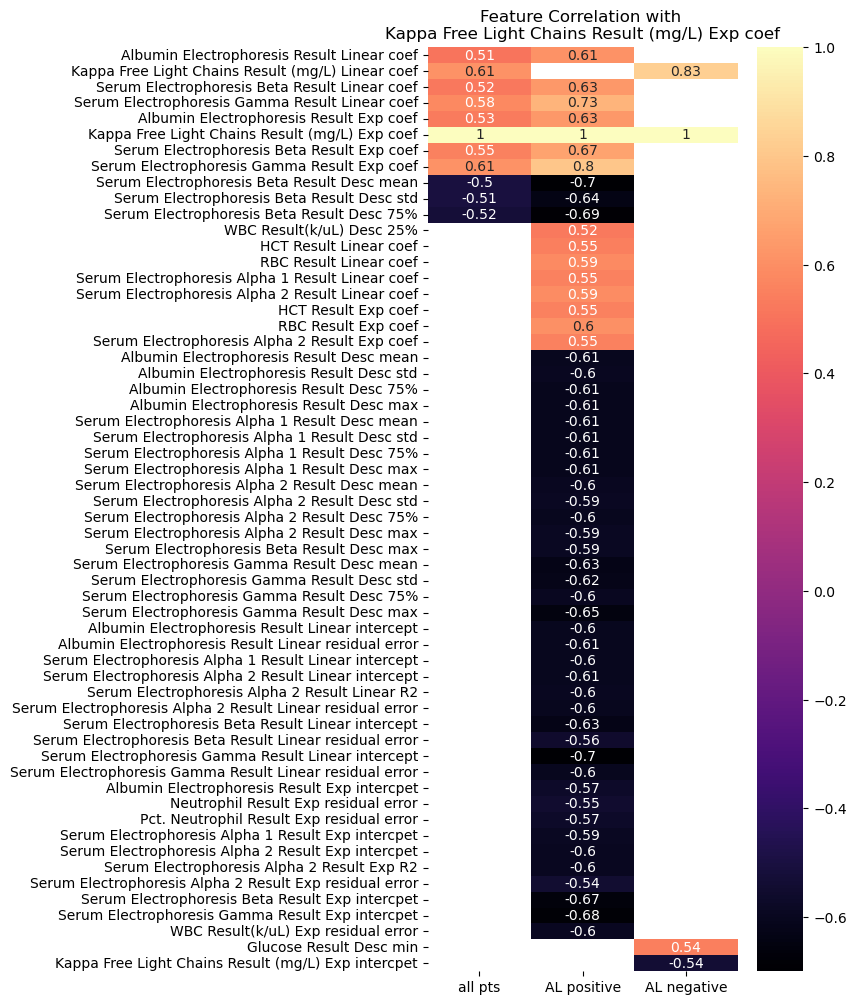

In [33]:
feature_name = "Kappa Free Light Chains Result (mg/L) Exp coef"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix kappa exp coef")

fig, ax = plt.subplots(figsize= (5,12))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_kappaExpCoef"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

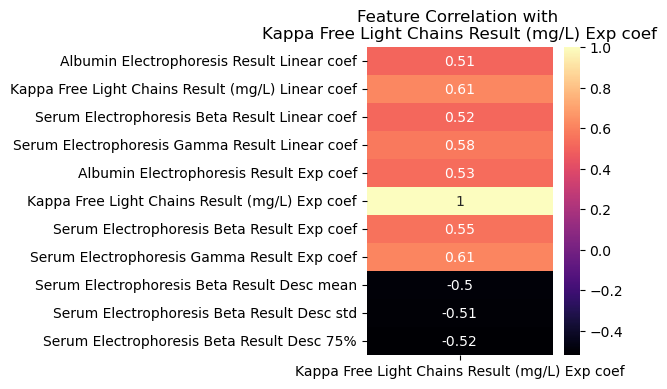

In [35]:
fig, ax = plt.subplots(figsize= (3,4))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_kappaExpCoef_allpts"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')

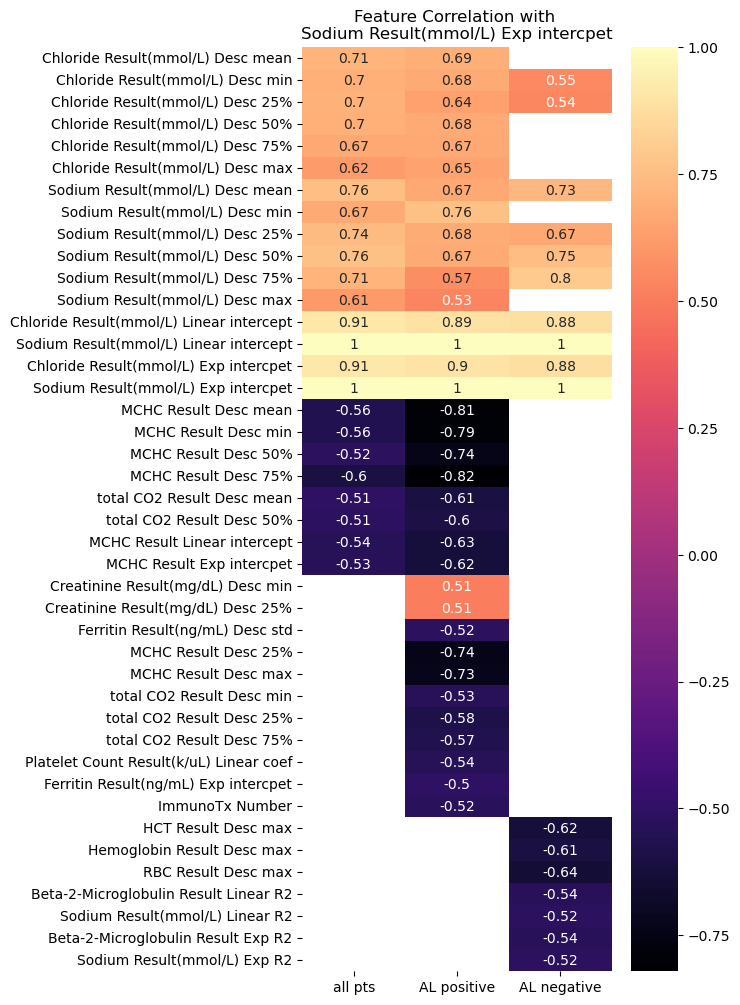

In [36]:
feature_name = "Sodium Result(mmol/L) Exp intercpet"

feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation[feature_name]>=0.5][feature_name], 
           feature_correlation[feature_correlation[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr[feature_name]>=0.5][feature_name], 
           features_ALpositive_corr[features_ALpositive_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr[feature_name]>=0.5][feature_name], 
           features_ALneg_corr[features_ALneg_corr[feature_name]<=-0.5][feature_name]], axis = 0)

feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

ptFn.outputToExcel(df_data = feat_corr_sig_concat, fileName_header= fileNameHeader, fileName_Common= fileNameCommon, fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix sodium exp int")

fig, ax = plt.subplots(figsize= (5,12))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with \n"+ str(feature_name))

figCommon = "heatmap_sodiumExpInt"
fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')
fig_file_out_jpg = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                        fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out, fileExtension= '.jpg')
fig.savefig(fig_file_out_jpg, bbox_inches = 'tight')